# Plot drone

## Loading modules

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
linearized_inputs = {
    'z': 'f',
    'phi': 'm_x',
    'theta': 'm_y',
    'psi': 'm_z'
}

var_labels = {
    'x': 'x', 'y': 'y', 'z':'z', 'theta': '\\theta', 'phi': '\\phi', 'psi': '\\psi',
    'f': 'f', 'm_x': 'm_x', 'm_y': 'm_y', 'm_z': 'm_z'
}

## Functions

In [39]:
def time_plot(variables, sim_out, title:str=None, filename:str=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        lines = list()
        ax, var = zipped
        ax.grid()
        base_name = var.replace('d', '')
        base_label = var.replace(base_name, var_labels[base_name])
        ylabel = f'${base_label}$'
        lines += ax.plot(sim_out['t'], sim_out[var], label=f'${base_label}$', color='C0')
        ref_name = f'ref_{var}'
        if ref_name in sim_out.columns:
            r_label = f'$r_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[ref_name], label=r_label, linestyle='--', color='k')
            ylabel += f', {r_label}'
        
        error_name = f'e_{var}'
        if error_name in sim_out.columns:
            error_label = f'$e_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[error_name], label=error_label, linestyle='--', color='C1')
            ylabel += f', {error_label}'

        input_name = f'u_{var}'
        if input_name in sim_out.columns:
            input_label = f'$u_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C2')
            # ylabel += f', ${input_name}$' if var == 'z' else f', $u_{{\\{var}}}$'
            ylabel += f', {input_label}'
        
        if var in linearized_inputs.keys():
            twinx = ax.twinx()
            input_name = linearized_inputs[var]
            input_label = f'${var_labels[input_name]}$'
            lines += twinx.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C3')
            twinx.set_ylabel(input_label)
        
        labels = [l.get_label() for l in lines]  
        ax.legend(lines, labels)
        
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=ylabel)
        else:
            ax.set(ylabel=ylabel, xlabel='Time (seconds)')
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [40]:
filename = '../drone_sim_out.csv'
sim_out = pd.read_csv(filename, index_col=0, dtype=float)
sim_out

,t,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,...,u_theta,u_psi,f,m_x,m_y,m_z,f1,f2,f3,f4
0.0,0.00000,0.010000,0.000000,0.010000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-0.010000,0.000000e+00,11.001100,-0.010000,-0.010000,0.000000e+00,8.253325,-2.752775,8.243325,-2.742775
1.0,0.00127,0.010000,-0.000013,0.010000,-0.000013,9.095880e-23,1.224508e-19,8.872571e-08,0.000140,-8.873014e-08,...,-0.010013,-1.225417e-19,10.999830,-0.010013,-0.010013,-1.225417e-19,8.252376,-2.752461,8.242363,-2.742448
2.0,0.01127,0.009999,-0.000113,0.009999,-0.000113,8.659129e-21,2.356208e-19,6.983630e-06,0.001239,-6.983980e-06,...,-0.010112,-2.442799e-19,10.989829,-0.010112,-0.010112,-2.442799e-19,8.244900,-2.749985,8.234788,-2.739873
3.0,0.02127,0.009998,-0.000215,0.009998,-0.000215,1.712942e-20,-4.002591e-18,2.486684e-05,0.002337,-2.486808e-05,...,-0.010210,3.985461e-18,10.979829,-0.010210,-0.010210,3.985461e-18,8.237424,-2.747510,8.227214,-2.737299
4.0,0.03127,0.009995,-0.000318,0.009995,-0.000318,-2.458757e-20,-6.469576e-18,5.372655e-05,0.003434,-5.372924e-05,...,-0.010308,6.494164e-18,10.969831,-0.010308,-0.010308,6.494164e-18,8.229950,-2.745035,8.219642,-2.734727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997.0,9.96127,0.161837,0.267048,0.161837,0.267048,6.078911e-17,-7.945603e-18,-1.504131e+00,-1.061250,1.522496e+00,...,-0.054964,-5.284351e-17,10.258715,-0.054964,-0.054964,-5.284351e-17,7.707777,-2.578420,7.652813,-2.523456
998.0,9.97127,0.164504,0.266477,0.164504,0.266477,6.071898e-17,-3.947775e-18,-1.514661e+00,-1.044799,1.533108e+00,...,-0.059263,-5.677121e-17,10.267750,-0.059263,-0.059263,-5.677121e-17,7.715628,-2.581753,7.656365,-2.522490
999.0,9.98127,0.167166,0.265863,0.167166,0.265863,6.068771e-17,-2.882159e-18,-1.525026e+00,-1.028074,1.543552e+00,...,-0.063583,-5.780556e-17,10.276924,-0.063583,-0.063583,-5.780556e-17,7.723588,-2.585127,7.660005,-2.521544
1000.0,9.99127,0.169822,0.265205,0.169822,0.265205,6.067202e-17,-1.331647e-18,-1.535222e+00,-1.011076,1.553825e+00,...,-0.067923,-5.934037e-17,10.286233,-0.067923,-0.067923,-5.934037e-17,7.731656,-2.588539,7.663732,-2.520616


## Drone positions over time

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$x$, $r_{x}$'>,
        <AxesSubplot:ylabel='$y$, $r_{y}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$z$, $r_{z}$, $e_{z}$, $u_{z}$'>],
       dtype=object))

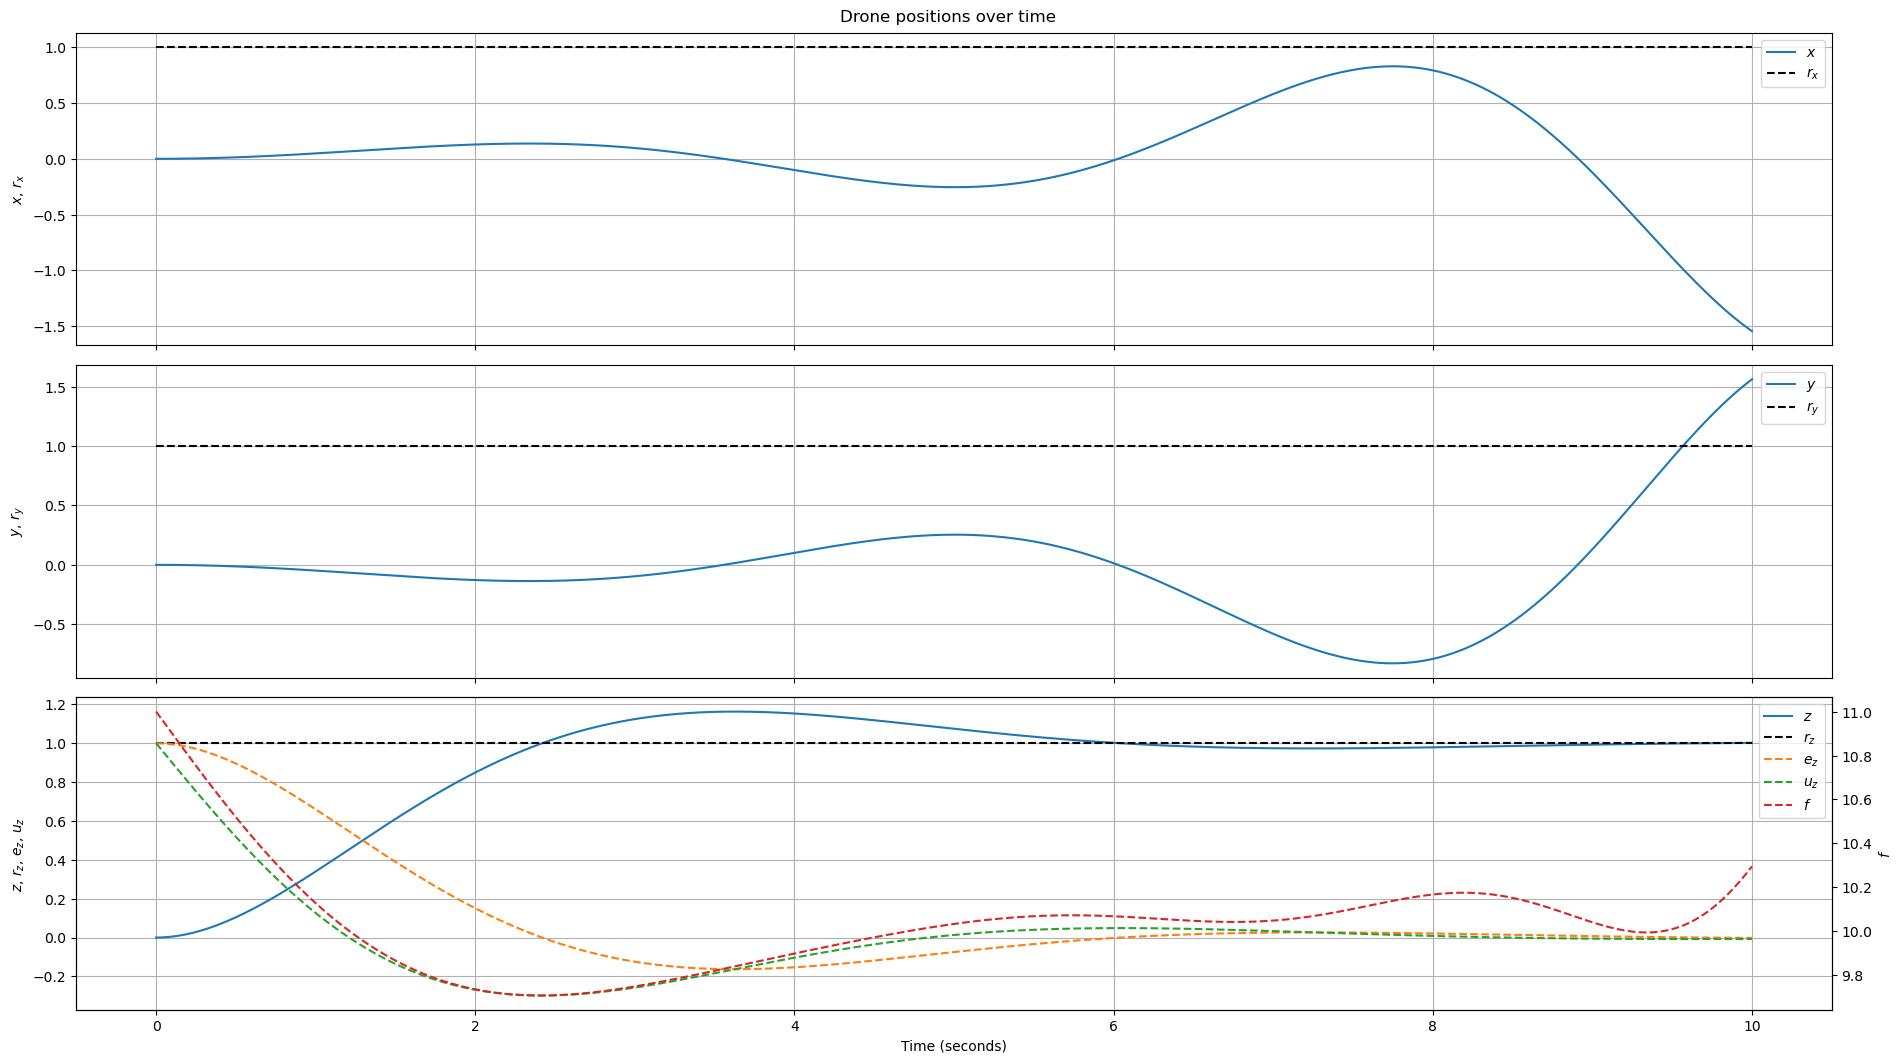

In [41]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time')

## Drone directions over time

(<Figure size 1920x1080 with 6 Axes>,
 array([<AxesSubplot:ylabel='$\\phi$, $r_{\\phi}$, $e_{\\phi}$, $u_{\\phi}$'>,
        <AxesSubplot:ylabel='$\\theta$, $r_{\\theta}$, $e_{\\theta}$, $u_{\\theta}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$\\psi$, $r_{\\psi}$, $u_{\\psi}$'>],
       dtype=object))

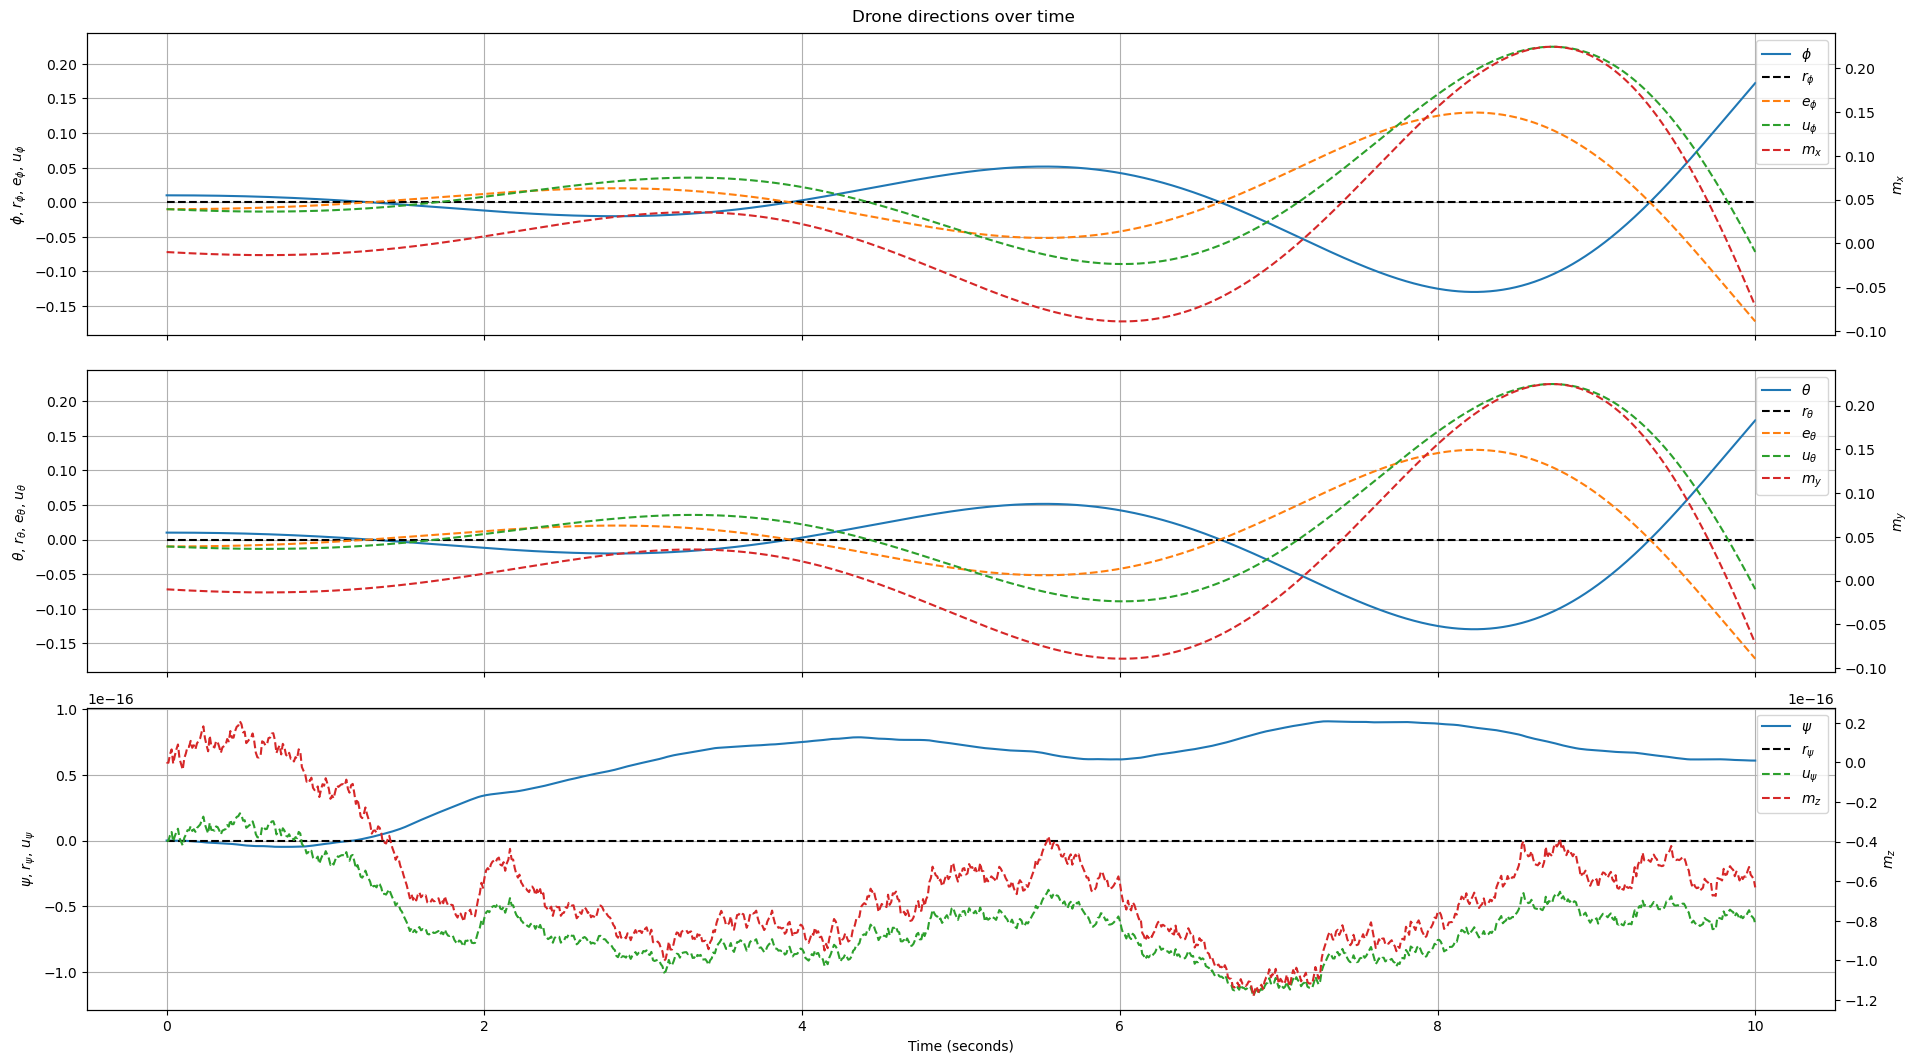

In [47]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time')

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$dx$, $r_{dx}$'>,
        <AxesSubplot:ylabel='$dy$, $r_{dy}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$dz$, $r_{dz}$'>],
       dtype=object))

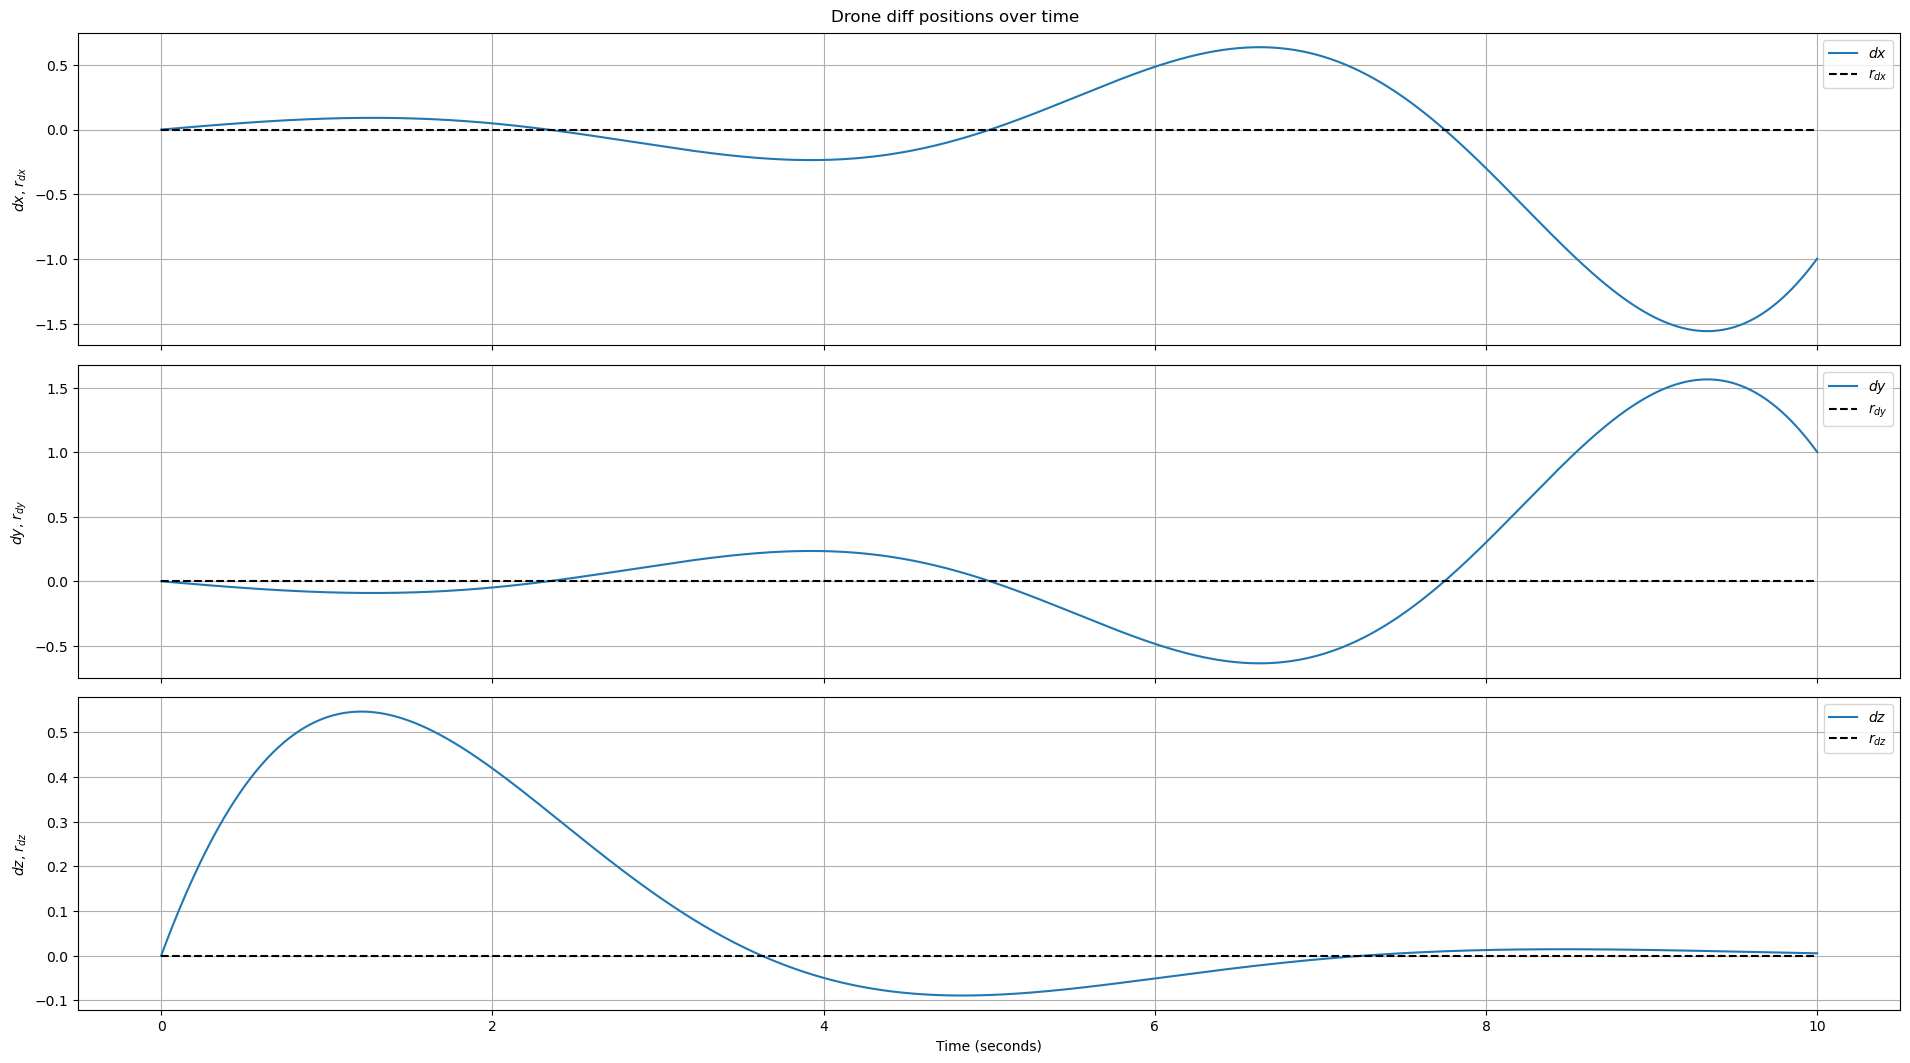

In [48]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time')

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$d\\phi$, $r_{d\\phi}$'>,
        <AxesSubplot:ylabel='$d\\theta$, $r_{d\\theta}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$d\\psi$, $r_{d\\psi}$'>],
       dtype=object))

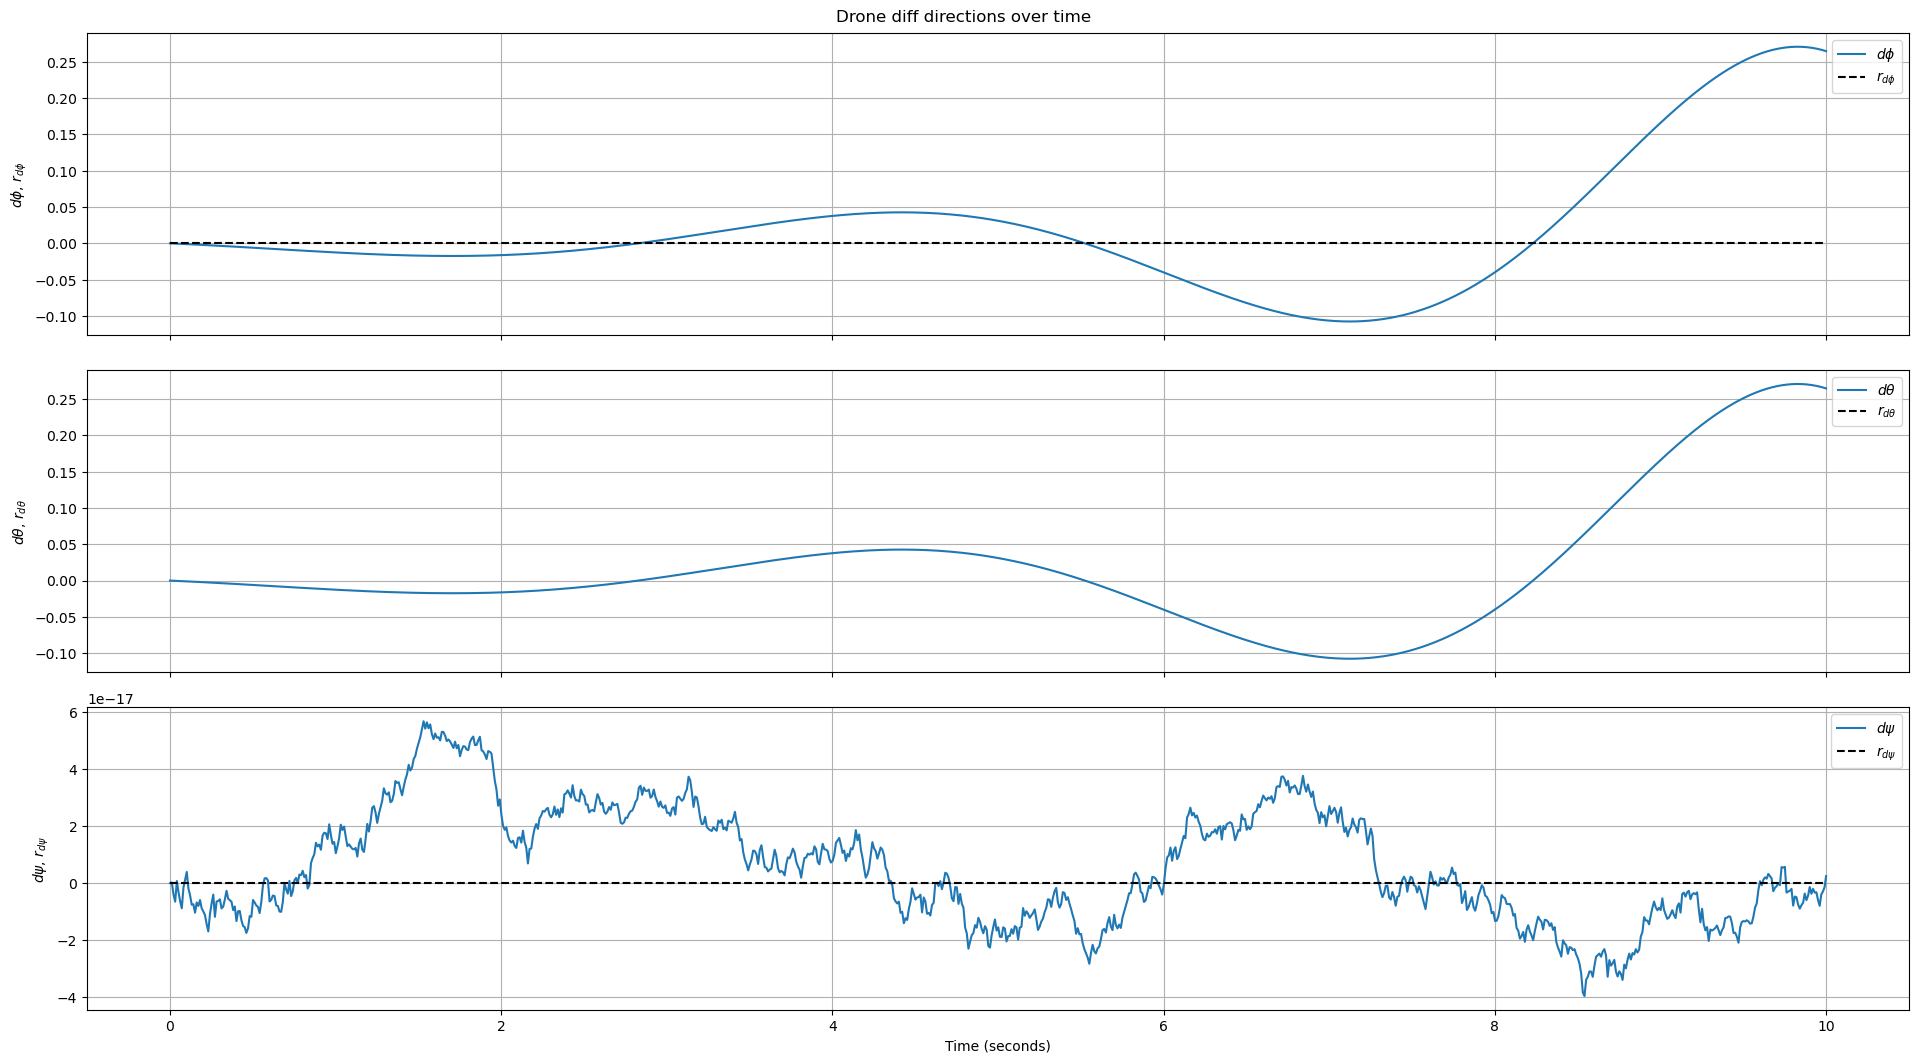

In [49]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time')

## Feedback Linearized Inputs

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$f$'>, <AxesSubplot:ylabel='$m_x$'>,
        <AxesSubplot:ylabel='$m_y$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$m_z$'>],
       dtype=object))

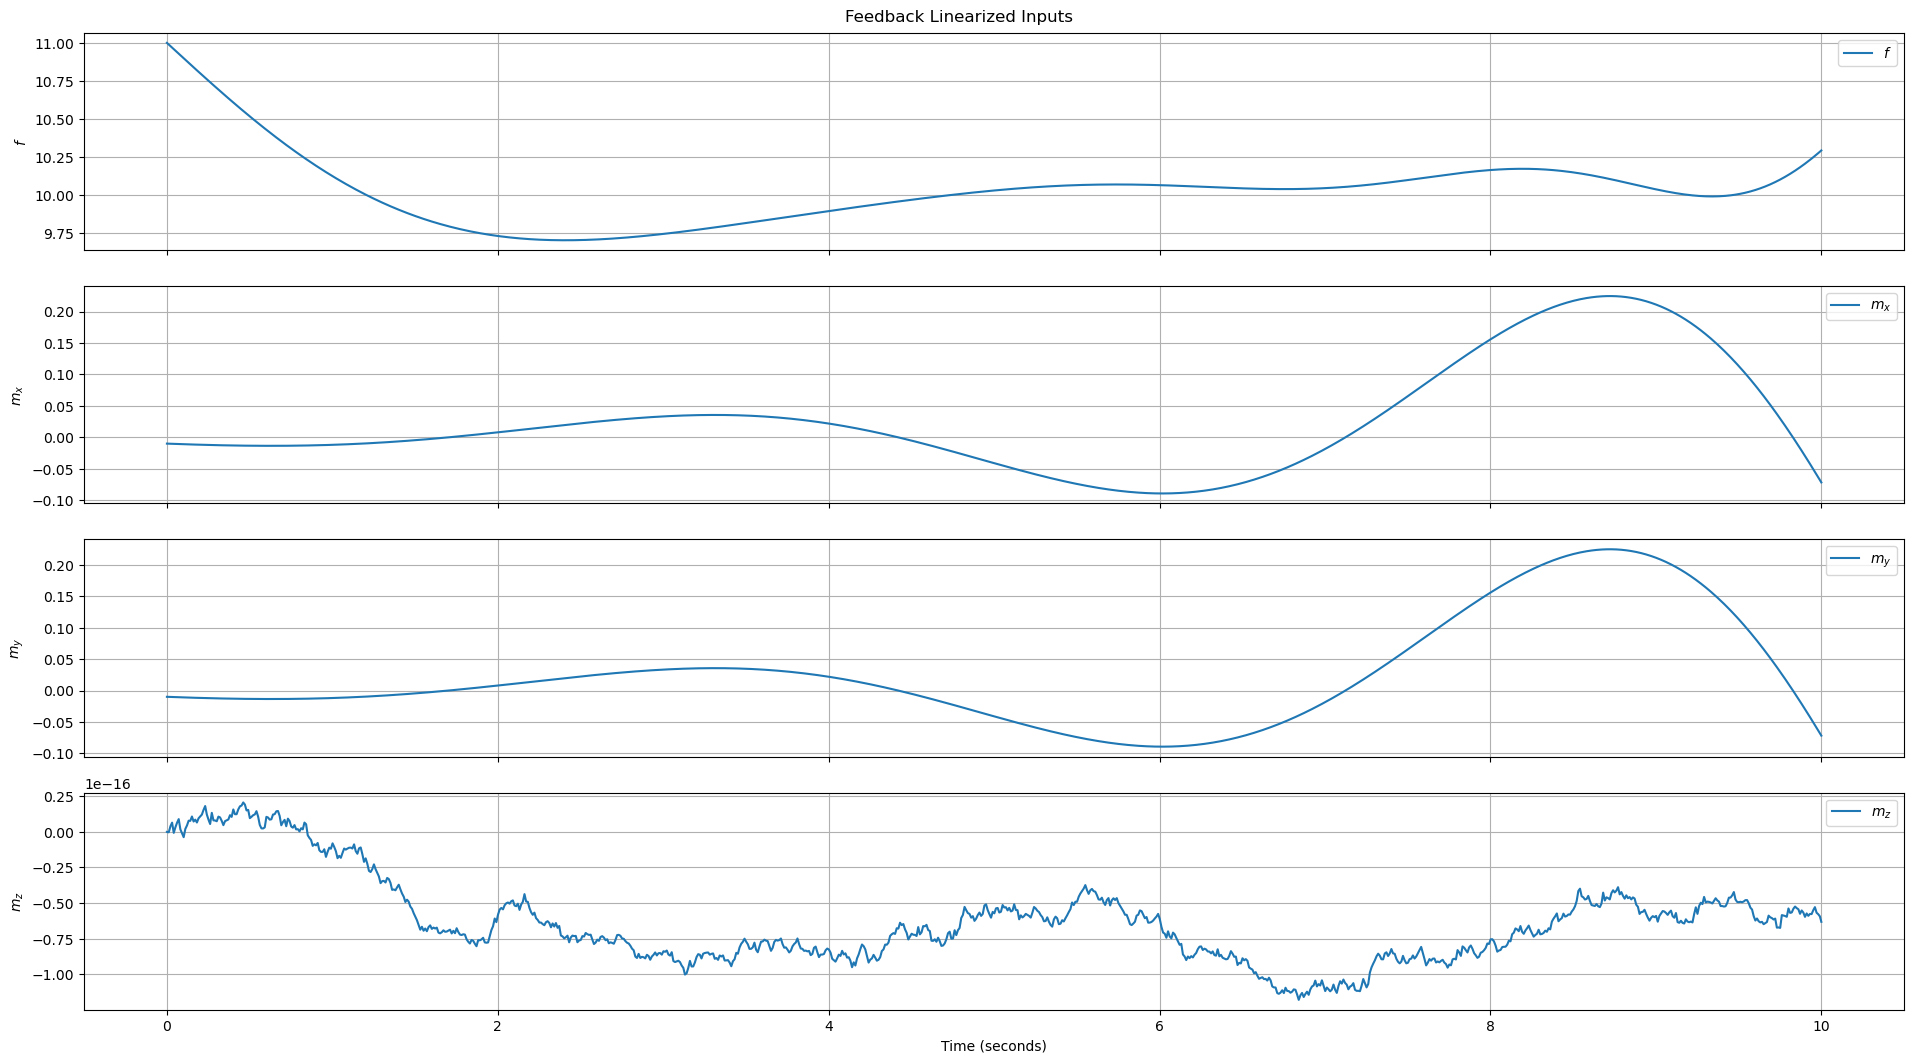

In [45]:
time_plot(['f', 'm_x', 'm_y', 'm_z'], sim_out, title='Feedback Linearized Inputs')

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

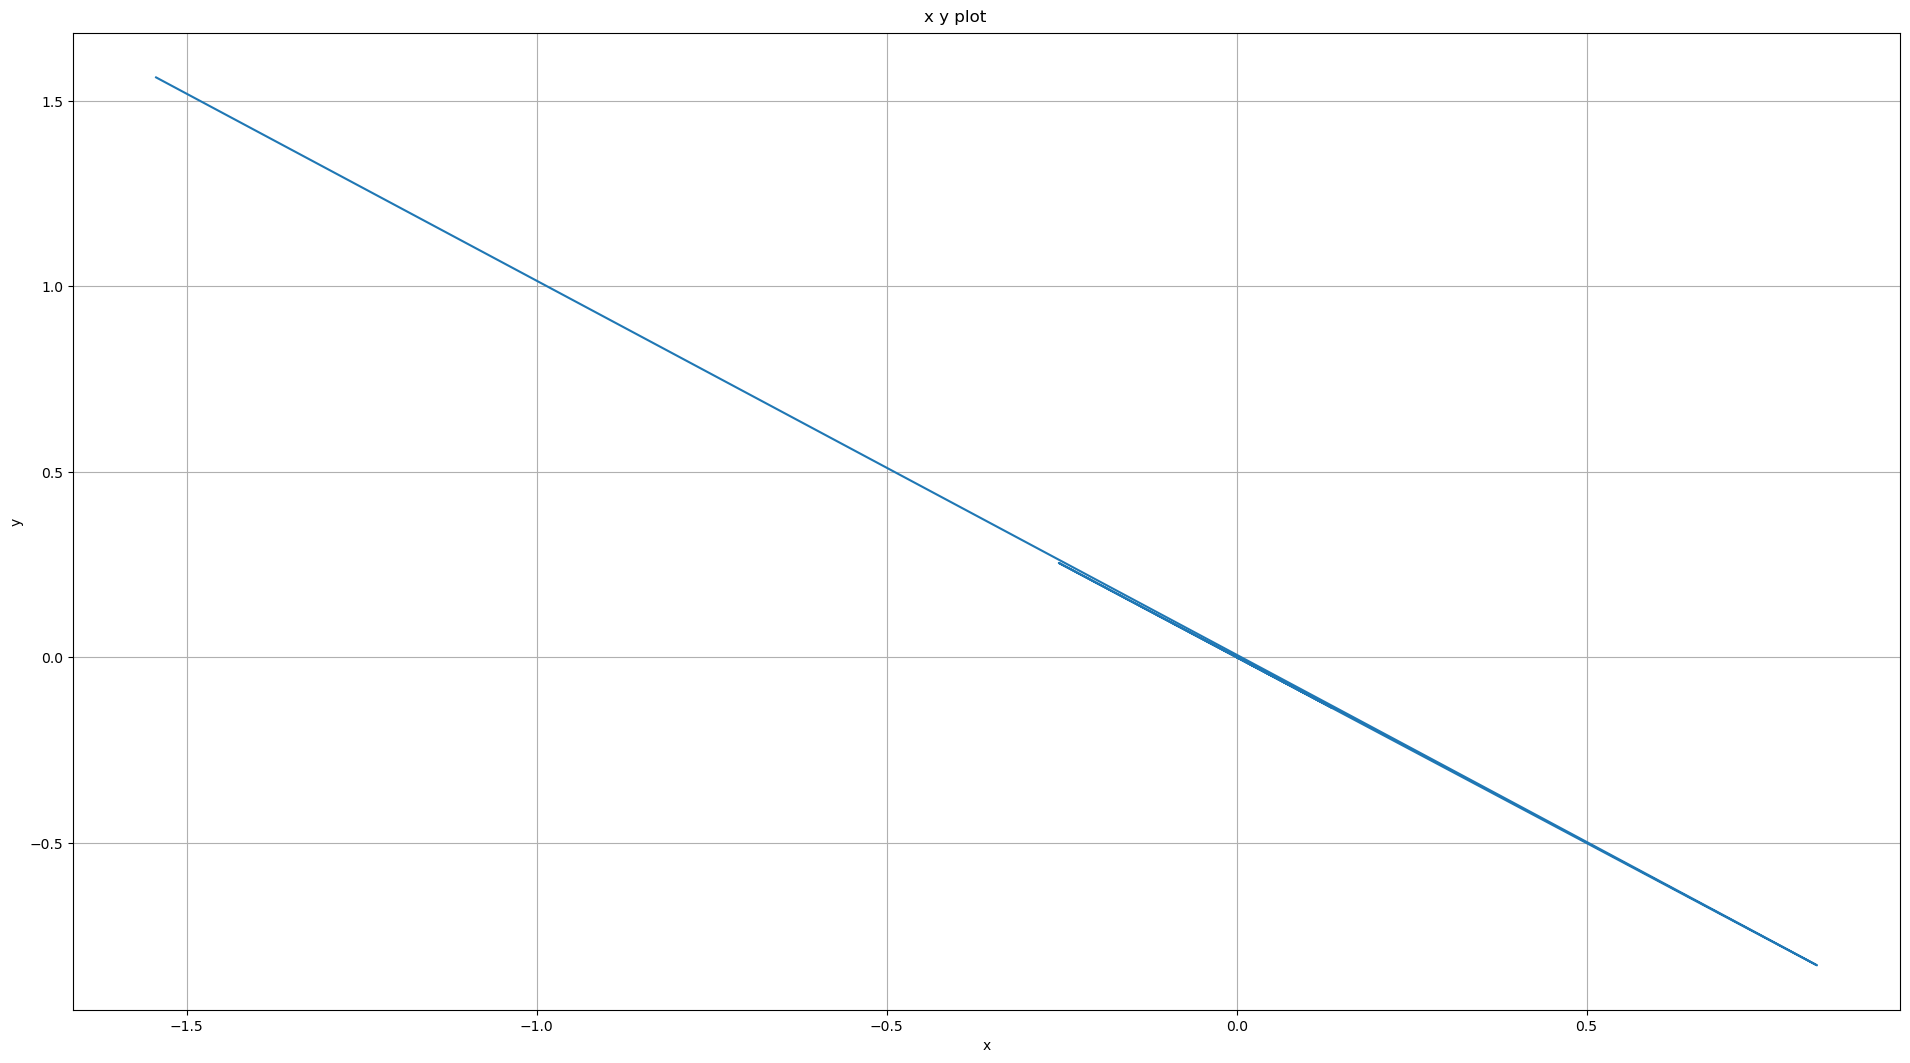

In [46]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x} {y} plot')